Show ID: 1371
Show URL: https://www.tvmaze.com/shows/1371/westworld
Show Name: Westworld
-----------------
Episode ID: 869671
Episode URL: https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original
Episode Name: The Original
Season: 1
Episode Number: 1
Type: regular
Airdate: 2016-10-02
Airtime: 09:00 PM
Runtime: 68
Average Rating: 8
Summary: A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.
Medium Image Link: https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg
Original Image Link: https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg
-----------------
-----------------
Episode ID: 911201
Episode URL: https://www.tvmaze.com/episodes/911201/westworld-1x02-chestnut
Episode Na

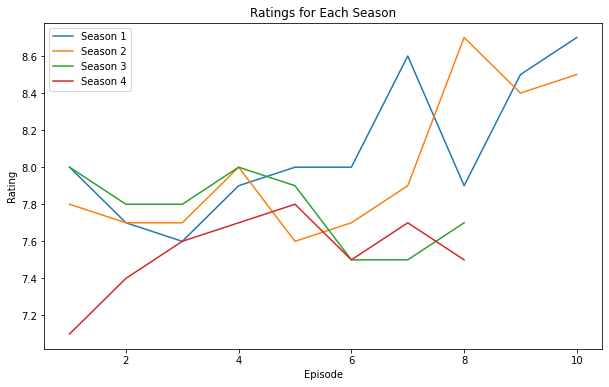

High-rated episodes for each season:
Season 1: Trompe L'Oeil, The Well-Tempered Clavier, The Bicameral Mind
Season 2: Kiksuya, Vanishing Point, The Passenger
Episodes aired before May 2019:
The Original, Chestnut, The Stray, Dissonance Theory, Contrapasso, The Adversary, Trompe L'Oeil, Trace Decay, The Well-Tempered Clavier, The Bicameral Mind, Journey Into Night, Reunion, Virtù e Fortuna, The Riddle of the Sphinx, Akane No Mai, Phase Space, Les Écorchés, Kiksuya, Vanishing Point, The Passenger
Episode with the highest rating in each season:
Season 1: The Bicameral Mind (Rating: 8.7)
Season 2: Kiksuya (Rating: 8.7)
Season 3: Parce Domine (Rating: 8)
Season 4: Zhuangzi (Rating: 7.8)
Episode with the lowest rating in each season:
Season 1: The Stray (Rating: 7.6)
Season 2: Akane No Mai (Rating: 7.6)
Season 3: Decoherence (Rating: 7.5)
Season 4: The Auguries (Rating: 7.1)


In [1]:
import requests
import json
import datetime
import matplotlib.pyplot as plt

def download_and_extract_data(url):
    try:
        # Download the data from the provided URL
        response = requests.get(url)
        data = response.json()

        # Extract the required data attributes
        show_id = data["id"]
        show_url = data["url"]
        show_name = data["name"]

        episodes = data["_embedded"]["episodes"]
        extracted_data = []

        for episode in episodes:
            episode_id = episode["id"]
            episode_url = episode["url"]
            episode_name = episode["name"]
            episode_season = episode["season"]
            episode_number = episode["number"]
            episode_type = episode["type"]

            # Convert airdate to date format
            airdate = datetime.datetime.strptime(episode["airdate"], "%Y-%m-%d").date()

            # Convert airtime to 12-hour time format
            airtime = datetime.datetime.strptime(episode["airtime"], "%H:%M").strftime("%I:%M %p")

            episode_runtime = episode["runtime"]
            episode_average_rating = episode["rating"]["average"]
            episode_summary = episode["summary"]

            # Remove HTML tags from the summary
            episode_summary = remove_html_tags(episode_summary)

            # Get medium and original image links
            episode_image_medium = episode["image"]["medium"]
            episode_image_original = episode["image"]["original"]

            # Create a dictionary of extracted data for each episode
            episode_data = {
                "id": episode_id,
                "url": episode_url,
                "name": episode_name,
                "season": episode_season,
                "number": episode_number,
                "type": episode_type,
                "airdate": airdate,
                "airtime": airtime,
                "runtime": episode_runtime,
                "average rating": episode_average_rating,
                "summary": episode_summary,
                "medium image link": episode_image_medium,
                "original image link": episode_image_original
            }

            extracted_data.append(episode_data)

        return show_id, show_url, show_name, extracted_data

    except Exception as e:
        print("An error occurred:", str(e))

def remove_html_tags(text):
    # Remove HTML tags from a given text using regex
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# Provide the URL to download the data
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Call the function to download and extract the data
show_id, show_url, show_name, extracted_data = download_and_extract_data(url)

# Print the extracted data
print("Show ID:", show_id)
print("Show URL:", show_url)
print("Show Name:", show_name)

for episode in extracted_data:
    print("-----------------")
    print("Episode ID:", episode["id"])
    print("Episode URL:", episode["url"])
    print("Episode Name:", episode["name"])
    print("Season:", episode["season"])
    print("Episode Number:", episode["number"])
    print("Type:", episode["type"])
    print("Airdate:", episode["airdate"])
    print("Airtime:", episode["airtime"])
    print("Runtime:", episode["runtime"])
    print("Average Rating:", episode["average rating"])
    print("Summary:", episode["summary"])
    print("Medium Image Link:", episode["medium image link"])
    print("Original Image Link:", episode["original image link"])
    print("-----------------")

# Insight 1: Get all the overall ratings for each season and compare the ratings for all the seasons
season_ratings = {}

for episode in extracted_data:
    season = episode["season"]
    rating = episode["average rating"]

    if season not in season_ratings:
        season_ratings[season] = []

    season_ratings[season].append(rating)

# Plotting the ratings for each season
plt.figure(figsize=(10, 6))

for season, ratings in season_ratings.items():
    plt.plot(range(1, len(ratings) + 1), ratings, label=f"Season {season}")

plt.xlabel("Episode")
plt.ylabel("Rating")
plt.title("Ratings for Each Season")
plt.legend()
plt.show()

# Insight 2: Get all the episode names whose average rating is more than 8 for every season
high_rated_episodes = {}

for episode in extracted_data:
    season = episode["season"]
    rating = episode["average rating"]
    name = episode["name"]

    if rating > 8:
        if season not in high_rated_episodes:
            high_rated_episodes[season] = []

        high_rated_episodes[season].append(name)

print("High-rated episodes for each season:")
for season, episodes in high_rated_episodes.items():
    print(f"Season {season}: {', '.join(episodes)}")

# Insight 3: Get all the episode names that aired before May 2019
episodes_before_2019 = []

for episode in extracted_data:
    airdate = episode["airdate"]

    if airdate < datetime.date(2019, 5, 1):
        episodes_before_2019.append(episode["name"])

print("Episodes aired before May 2019:")
print(", ".join(episodes_before_2019))

# Insight 4: Get the episode name from each season with the highest and lowest rating
highest_rated_episodes = {}
lowest_rated_episodes = {}

for episode in extracted_data:
    season = episode["season"]
    rating = episode["average rating"]
    name = episode["name"]

    if season not in highest_rated_episodes:
        highest_rated_episodes[season] = {"name": "", "rating": 0}
        lowest_rated_episodes[season] = {"name": "", "rating": float("inf")}

    if rating > highest_rated_episodes[season]["rating"]:
        highest_rated_episodes[season]["name"] = name
        highest_rated_episodes[season]["rating"] = rating

    if rating < lowest_rated_episodes[season]["rating"]:
        lowest_rated_episodes[season]["name"] = name
        lowest_rated_episodes[season]["rating"] = rating

print("Episode with the highest rating in each season:")
for season, episode_info in highest_rated_episodes.items():
    print(f"Season {season}: {episode_info['name']} (Rating: {episode_info['rating']})")

print("Episode with the lowest rating in each season:")
for season, episode_info in lowest_rated_episodes.items():
    print(f"Season {season}: {episode_info['name']} (Rating: {episode_info['rating']})")

# Insight 5: Get the summary for the most popular (ratings) episode in every season
most_popular_episodes = {}

for episode in extracted_data:
    season = episode["season"]
    rating = episode["average rating"]
    summary = episode["summary"]

    if season not in most_popular_episodes:
        most_popular_episodes[season] = {"summary": "", "rating": 0}

    if rating > most_popular_episodes[season]["rating"]:
        most_popular_episodes[season]["summary"] = summary
        most_popular_episodes